In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Statsmodels Time Series Excercises
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [3]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Data/EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [4]:
# CODE HERE

df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [5]:
df.index.freq ='MS'

In [6]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

In [ ]:
# DON'T WRITE HERE

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. Plot the dataset.

In [ ]:
# CODE HERE


In [7]:
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


<Axes: xlabel='DATE'>

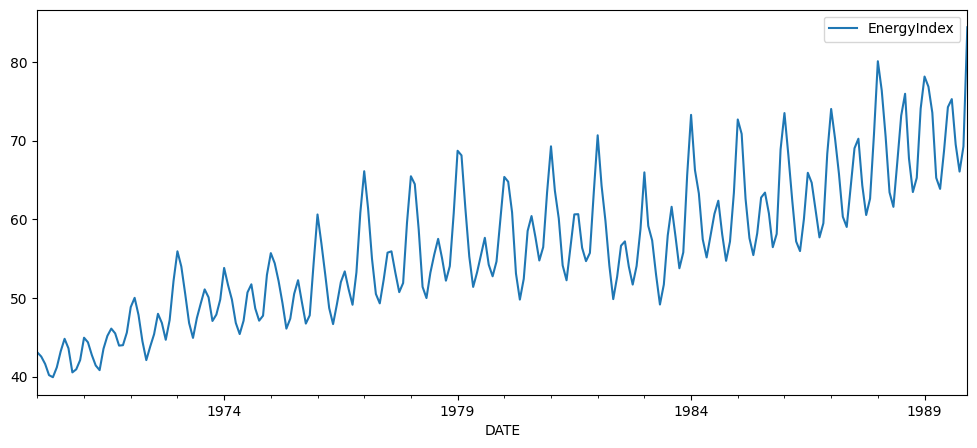

In [9]:
df.plot(figsize = (12,5))

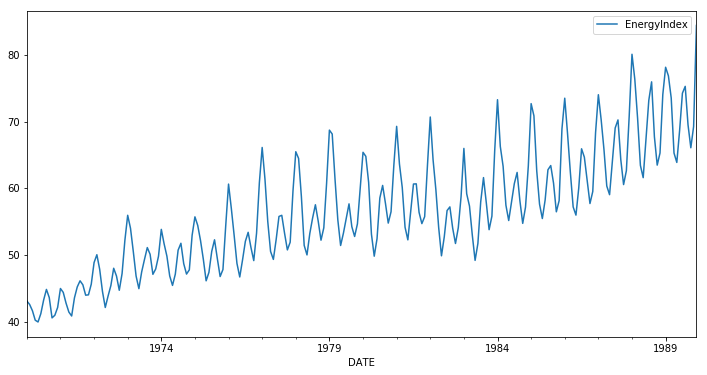

In [ ]:
# DON'T WRITE HERE

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

In [10]:

df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [12]:
df['12-Month-SMA'] = df['EnergyIndex'].rolling(window =12).mean()

In [13]:
df.head()

,EnergyIndex,12-Month-SMA
DATE,,
1970-01-01,43.0869,NaN
1970-02-01,42.5577,NaN
1970-03-01,41.6215,NaN
1970-04-01,40.1982,NaN
1970-05-01,39.9321,NaN


In [14]:
df.columns

Index(['EnergyIndex', '12-Month-SMA'], dtype='object')

<Axes: xlabel='DATE'>

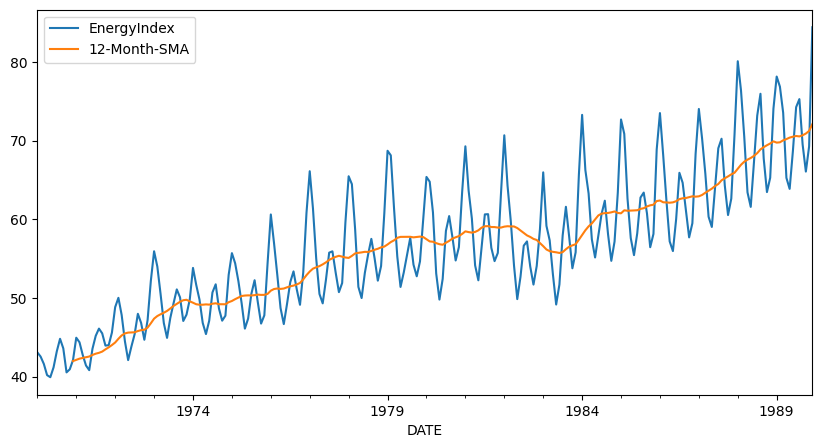

In [15]:
df[['EnergyIndex', '12-Month-SMA']].plot(figsize=(10,5))

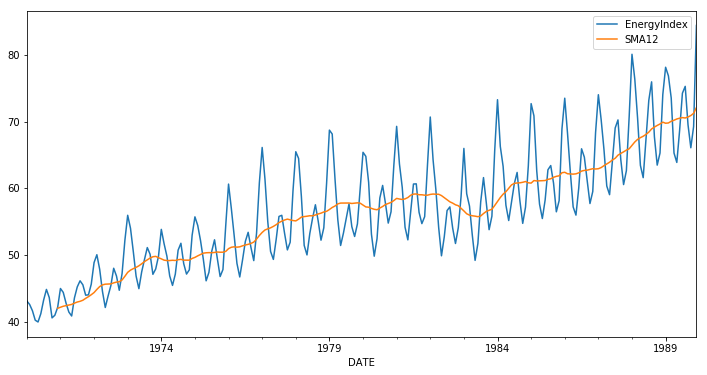

In [ ]:
# DON'T WRITE HERE

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

In [16]:
# DON'T FORGET TO PERFORM THE IMPORT!

from statsmodels.tsa.holtwinters import SimpleExpSmoothing





In [17]:
span  = 12
alpha = 2/(span +1)

In [18]:
df['EWMA12'] = df['EnergyIndex'].ewm(alpha=alpha, adjust= False) .mean()

In [19]:
df['EWMA12'].head()

DATE
1970-01-01    43.086900
1970-02-01    43.005485
1970-03-01    42.792564
1970-04-01    42.393431
1970-05-01    42.014765
Freq: MS, Name: EWMA12, dtype: float64

In [ ]:
# now we are going to use SimpleExpsmoothing  to produce the same output

In [20]:
model = SimpleExpSmoothing(df['EnergyIndex'])

In [21]:
model.fit(smoothing_level= alpha, optimized= False)

In [22]:
fitted_model = model.fit(smoothing_level= alpha, optimized= False)

In [23]:
fitted_model.fittedvalues

DATE
1970-01-01    43.086900
1970-02-01    43.086900
1970-03-01    43.005485
1970-04-01    42.792564
1970-05-01    42.393431
                ...    
1989-08-01    70.165231
1989-09-01    70.950641
1989-10-01    70.729112
1989-11-01    70.011095
1989-12-01    69.894849
Freq: MS, Length: 240, dtype: float64

In [ ]:
# we need to shift by 1

In [24]:
fitted_model.fittedvalues.shift(-1)

DATE
1970-01-01    43.086900
1970-02-01    43.005485
1970-03-01    42.792564
1970-04-01    42.393431
1970-05-01    42.014765
                ...    
1989-08-01    70.950641
1989-09-01    70.729112
1989-10-01    70.011095
1989-11-01    69.894849
1989-12-01          NaN
Freq: MS, Length: 240, dtype: float64

In [25]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [26]:
df.head()

,EnergyIndex,12-Month-SMA,EWMA12,SES12
DATE,,,,
1970-01-01,43.0869,NaN,43.086900,43.086900
1970-02-01,42.5577,NaN,43.005485,43.005485
1970-03-01,41.6215,NaN,42.792564,42.792564
1970-04-01,40.1982,NaN,42.393431,42.393431
1970-05-01,39.9321,NaN,42.014765,42.014765


In [27]:
df.columns

Index(['EnergyIndex', '12-Month-SMA', 'EWMA12', 'SES12'], dtype='object')

<Axes: xlabel='DATE'>

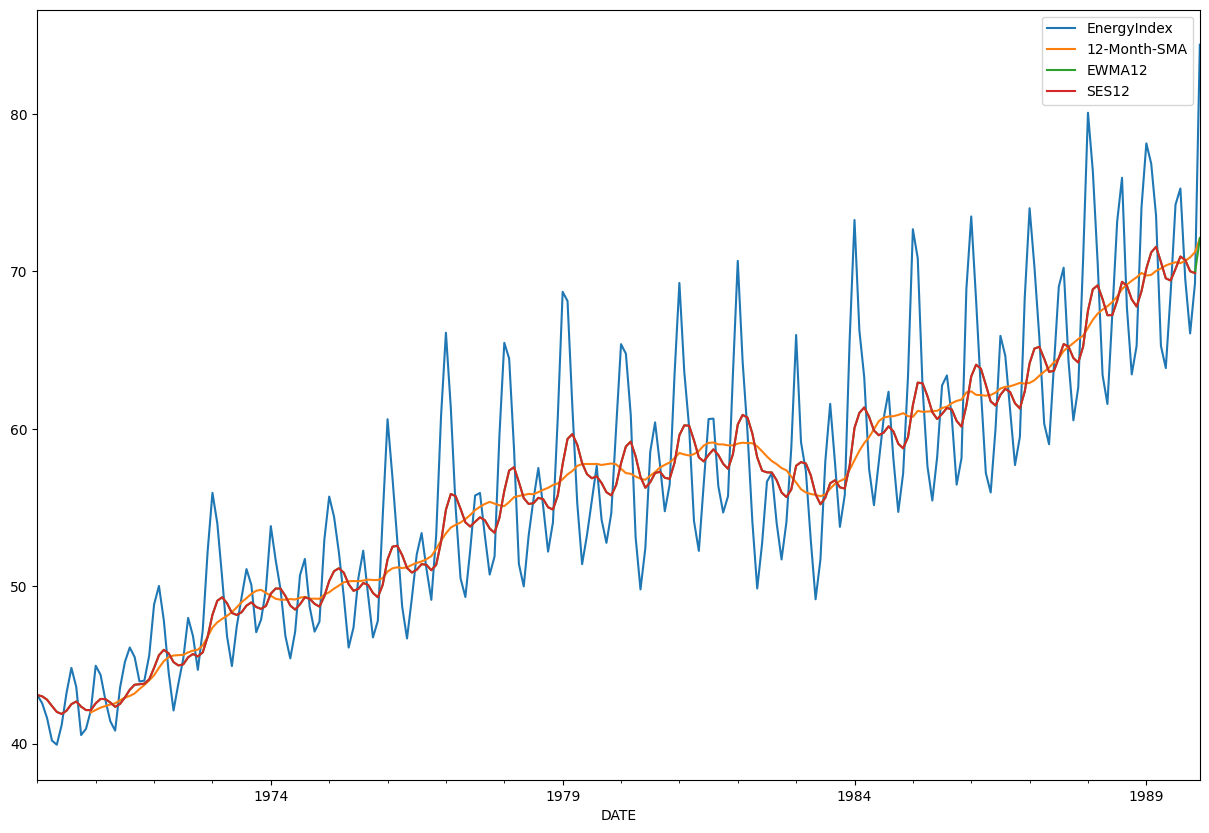

In [35]:
df.plot(figsize =(15,10))

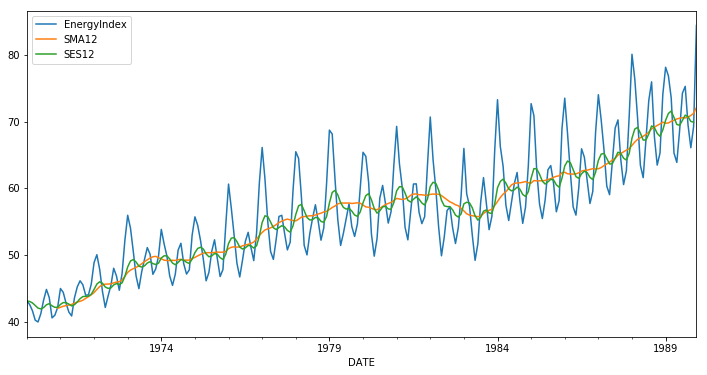

In [ ]:
# DON'T WRITE HERE

### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

In [37]:
# DON'T FORGET TO PERFORM THE IMPORT!

from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [38]:
model = ExponentialSmoothing(df['EnergyIndex'], trend = 'add')

In [40]:
fitted_model = model.fit()

In [43]:
df['ESM_add'] =fitted_model.fittedvalues.shift(-1)

In [44]:
df.head()

,EnergyIndex,12-Month-SMA,EWMA12,SES12,ESM_add
DATE,,,,,
1970-01-01,43.0869,NaN,43.086900,43.086900,43.260343
1970-02-01,42.5577,NaN,43.005485,43.005485,42.731143
1970-03-01,41.6215,NaN,42.792564,42.792564,41.794943
1970-04-01,40.1982,NaN,42.393431,42.393431,40.371643
1970-05-01,39.9321,NaN,42.014765,42.014765,40.105543


In [45]:
df.columns

Index(['EnergyIndex', '12-Month-SMA', 'EWMA12', 'SES12', 'ESM_add'], dtype='object')

In [46]:
df['DESmul12'] = ExponentialSmoothing(df['EnergyIndex'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,EnergyIndex,12-Month-SMA,EWMA12,SES12,ESM_add,DESmul12
DATE,,,,,,
1970-01-01,43.0869,NaN,43.086900,43.086900,43.260343,43.114456
1970-02-01,42.5577,NaN,43.005485,43.005485,42.731143,42.584917
1970-03-01,41.6215,NaN,42.792564,42.792564,41.794943,41.648116
1970-04-01,40.1982,NaN,42.393431,42.393431,40.371643,40.223903
1970-05-01,39.9321,NaN,42.014765,42.014765,40.105543,39.957628


<Axes: xlabel='DATE'>

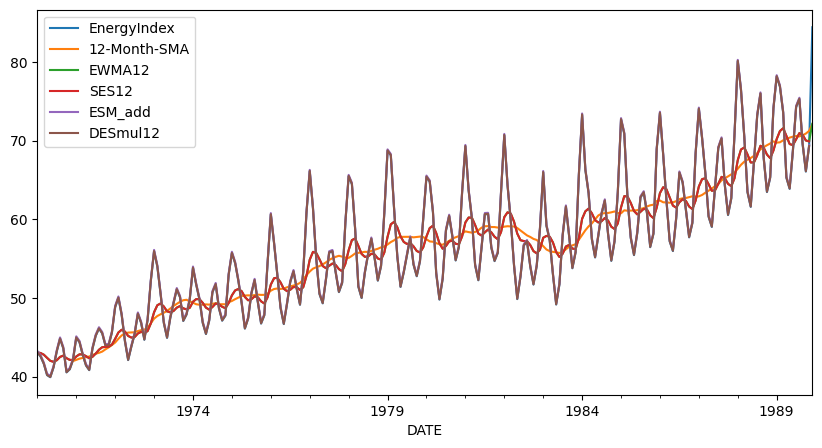

In [48]:
df.plot(figsize=(10,5))

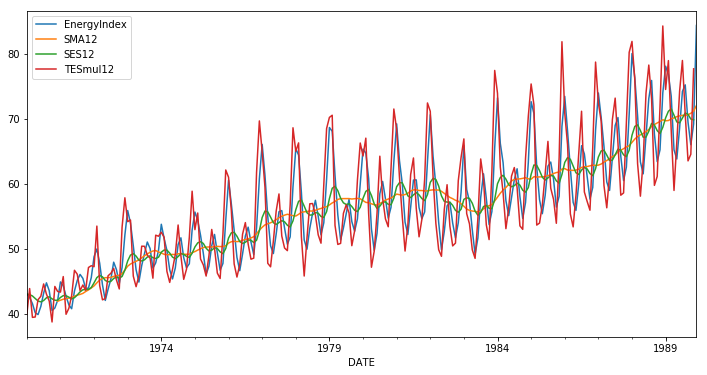

In [ ]:
# DON'T WRITE HERE

### OPTIONAL: Plot the same  as above, but for only the first two years.

In [49]:
# nowlet us talk about triple expotential smoothing model

In [50]:
model = ExponentialSmoothing(df['EnergyIndex'], trend='mul',seasonal='mul',seasonal_periods=12)

In [52]:
fitted_model = model.fit()

In [53]:
fitted_model.fittedvalues

DATE
1970-01-01    43.086819
1970-02-01    41.068173
1970-03-01    39.724769
1970-04-01    37.962038
1970-05-01    38.600719
                ...    
1989-08-01    75.967282
1989-09-01    70.881247
1989-10-01    65.929088
1989-11-01    68.275757
1989-12-01    78.235657
Freq: MS, Length: 240, dtype: float64

In [54]:
df['TES12'] = fitted_model.fittedvalues


In [55]:
df.head()

,EnergyIndex,12-Month-SMA,EWMA12,SES12,ESM_add,DESmul12,TES12
DATE,,,,,,,
1970-01-01,43.0869,NaN,43.086900,43.086900,43.260343,43.114456,43.086819
1970-02-01,42.5577,NaN,43.005485,43.005485,42.731143,42.584917,41.068173
1970-03-01,41.6215,NaN,42.792564,42.792564,41.794943,41.648116,39.724769
1970-04-01,40.1982,NaN,42.393431,42.393431,40.371643,40.223903,37.962038
1970-05-01,39.9321,NaN,42.014765,42.014765,40.105543,39.957628,38.600719


In [56]:
df.columns

Index(['EnergyIndex', '12-Month-SMA', 'EWMA12', 'SES12', 'ESM_add', 'DESmul12',
       'TES12'],
      dtype='object')

<Axes: xlabel='DATE'>

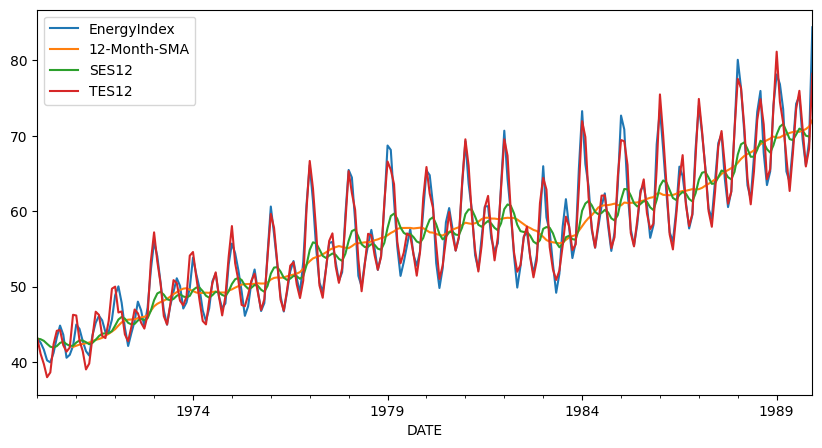

In [58]:
df[['EnergyIndex', '12-Month-SMA', 'SES12','TES12']].plot(figsize = (10,5))

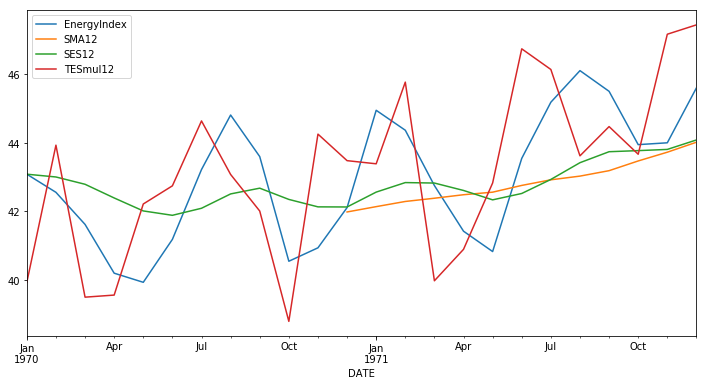

In [ ]:
# DON'T WRITE HERE

### BONUS QUESTION: There is a visible decline in the Industrial Production Index around 1982-1983.<br>Why do you think this might be?

## Great job!